# Setup & import libraries

In [302]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.ensemble import BalancedRandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [9]:
names_col = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
             'hours_per_week', 'native_country', 'income']
df = pd.read_csv("adult.data", names=names_col)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Exploration Data Analysis - EDA

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
print(f"Amout of samples: {len(df)}")

Amout of samples: 32561


## Checking if exist missing values

In [13]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

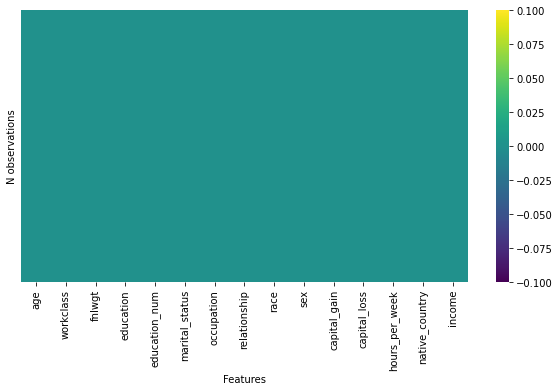

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")
plt.ylabel("N observations")
plt.xlabel("Features")
plt.show()

## Univariete Analysis

In [45]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df.select_dtypes(include=numerics).columns.to_list()

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [46]:
def get_num_feature():
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    features = df.select_dtypes(include=numerics).columns.to_list()
    return features

In [48]:
num_features = get_num_feature()
print(f"Numerical Features: {num_features}")

Numerical Features: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [31]:
def univariate_analysis(feature):
    f, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.histplot(x=feature, data=df, ax=axes[0])
    sns.boxplot(x=feature, data=df, ax=axes[1])
    plt.show()

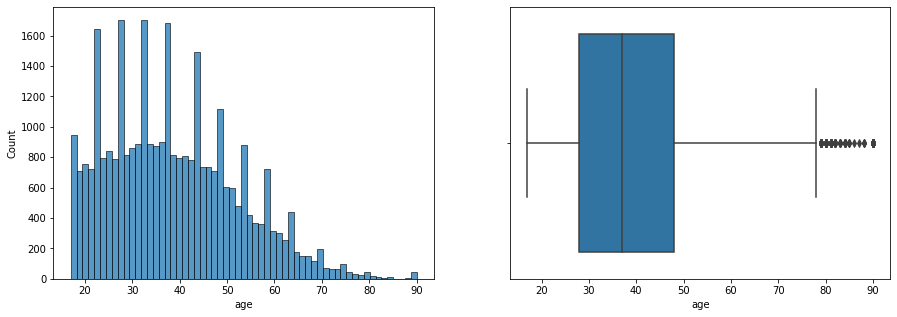

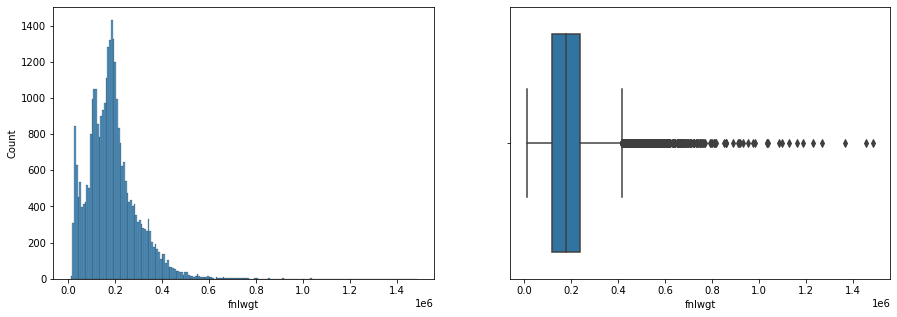

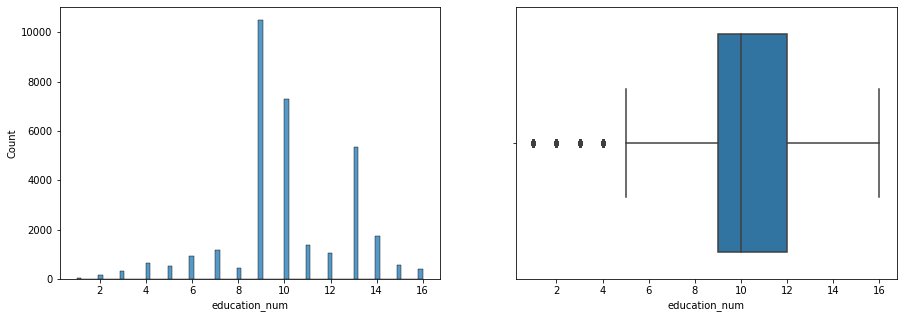

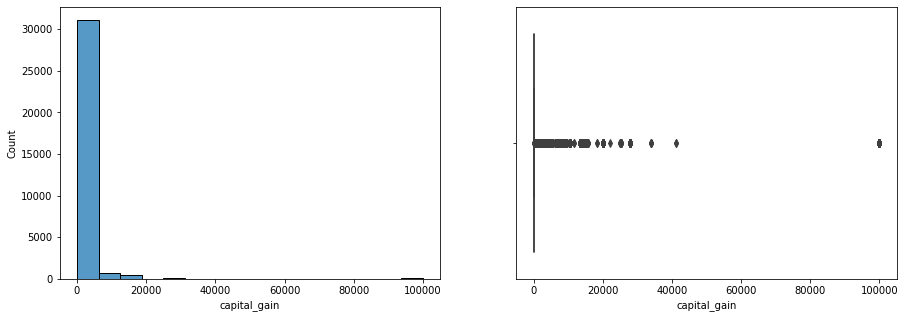

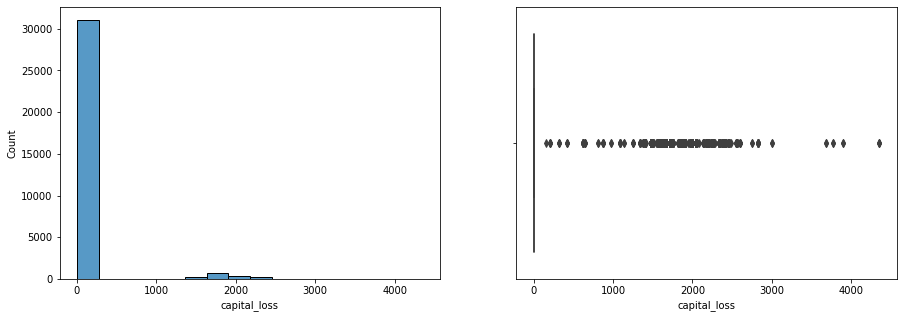

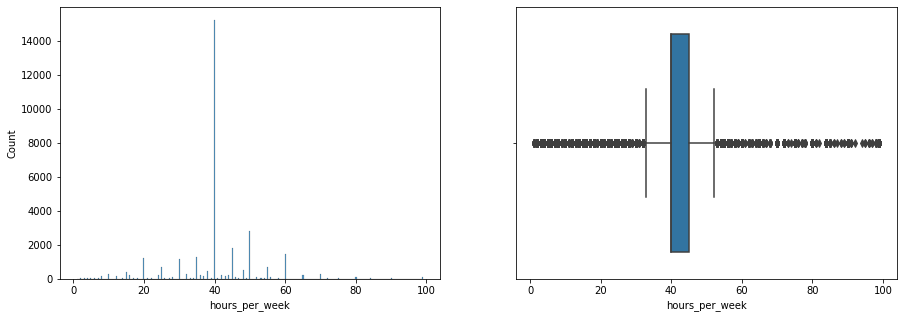

In [49]:
for feature in num_features:
    univariate_analysis(feature=feature)

## Multivariate Analysis




<Figure size 720x360 with 0 Axes>

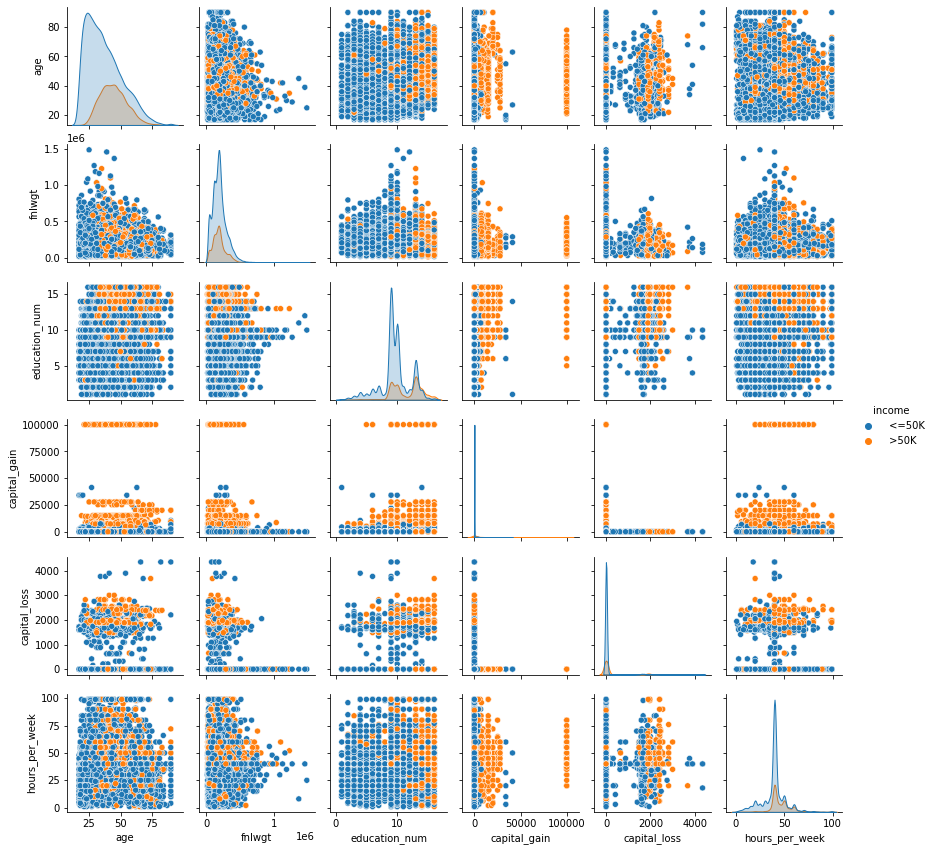

In [53]:
fig = plt.figure(figsize=(10,5))
sns.pairplot(df, hue='income', height=2)
plt.show()

# Preprocessing 

## Split the target from independent variables 

In [93]:
y = df.income.replace({" <=50K": 0, " >50K": 1}) # target
X = df.drop(["income"], axis= 1)

In [80]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [95]:
y.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [97]:
print(f"Event Rate: {round(y.mean()*100, 2)}%")

Event Rate: 24.08%


## Split features into numerical and Categorical

In [435]:
numerical_features = X.select_dtypes(include="number")
categorical_features = X.select_dtypes(include="object")

In [99]:
# look at the type of numerical features
numerical_features.dtypes

age               int64
fnlwgt            int64
education_num     int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
dtype: object

In [100]:
# look at the type of categorical features
categorical_features.dtypes

workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
native_country    object
dtype: object

In [436]:
# Detect if in numerical feature has low distict values
def unique_levels(x):
    x = x.value_counts().count()
    return x

df_value_counts = pd.DataFrame(numerical_features.apply(lambda x: unique_levels(x)))
df_value_counts.columns = ["feature_levels"]
df_value_counts

,feature_levels
age,73
fnlwgt,21648
education_num,16
capital_gain,119
capital_loss,92
hours_per_week,94


In [106]:
numerical_features.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


**Outlier Analysis of Numerical Features**

In [107]:
numerical_features.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85,
                                         0.90, 0.99])

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
1%,17.000000,2.718580e+04,3.000000,0.000000,0.000000,8.000000
5%,19.000000,3.946000e+04,5.000000,0.000000,0.000000,18.000000
10%,22.000000,6.571600e+04,7.000000,0.000000,0.000000,24.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000


**Capping and Flooring of outliers**

In [437]:
def outlier_cap(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    return x

In [438]:
numerical_features = numerical_features.apply(lambda x: outlier_cap(x))

In [110]:
numerical_features.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85,
                                         0.90, 0.99])

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.00000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.528331,188564.27689,10.088971,633.811400,83.800068,40.390406
std,13.481022,99738.04222,2.547541,2521.104326,382.955091,11.939226
min,17.000000,27185.80000,3.000000,0.000000,0.000000,8.000000
1%,17.000000,27186.52000,3.000000,0.000000,0.000000,8.000000
5%,19.000000,39460.00000,5.000000,0.000000,0.000000,18.000000
10%,22.000000,65716.00000,7.000000,0.000000,0.000000,24.000000
25%,28.000000,117827.00000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178356.00000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237051.00000,12.000000,0.000000,0.000000,45.000000


## Feature Selection/Discretization - Numerical Features

**Remove features with has 0 variance**

In [439]:
vt = VarianceThreshold(threshold=0)
vt.fit_transform(numerical_features)

# get columns to keep and create new dataframe with those only
cols = vt.get_support(indices=True)
num_feat_none_var = numerical_features.iloc[:,cols]

In [441]:
num_feat_none_var.iloc[0]

age                  39.0
fnlwgt            77516.0
education_num        13.0
capital_gain       2174.0
capital_loss          0.0
hours_per_week       40.0
Name: 0, dtype: float64

**Feature Discretization**

In [125]:
discrete = KBinsDiscretizer(n_bins=6, encode="ordinal", strategy="quantile")

num_binned = pd.DataFrame(discrete.fit_transform(num_feat_none_var), index=num_feat_none_var.index,
                          columns=num_feat_none_var.columns).add_suffix('_Rank')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." %

In [126]:
num_binned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age_Rank             32561 non-null  float64
 1   fnlwgt_Rank          32561 non-null  float64
 2   education_num_Rank   32561 non-null  float64
 3   capital_gain_Rank    32561 non-null  float64
 4   capital_loss_Rank    32561 non-null  float64
 5   hours_per_week_Rank  32561 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


**Check if the feature show a slop at all**

Note: a strong slope is indicate of the feature's ability to discriminate the event from non event making it a good predictor



In [130]:
def check_slope():
    X_bin_combined = pd.concat([y, num_binned], axis=1, join="inner")

    for col in (num_binned.columns):
        plt.figure(figsize=(10,5))
        sns.lineplot(x=col, y=X_bin_combined["income"].mean(), data=X_bin_combined)
        sns.barplot(x=col, y="income", data=X_bin_combined, estimator=np.mean)

    plt.show()

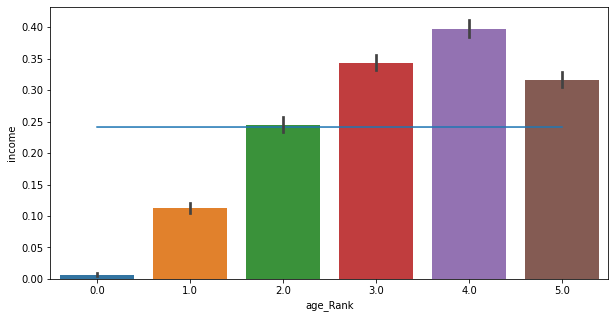

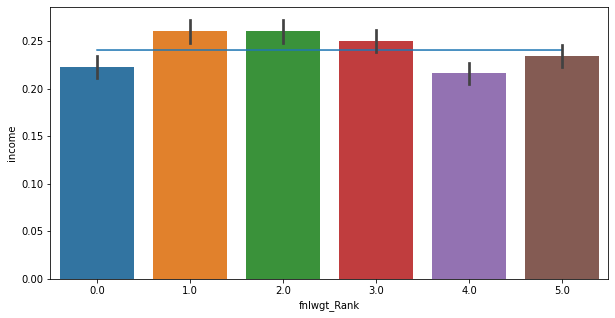

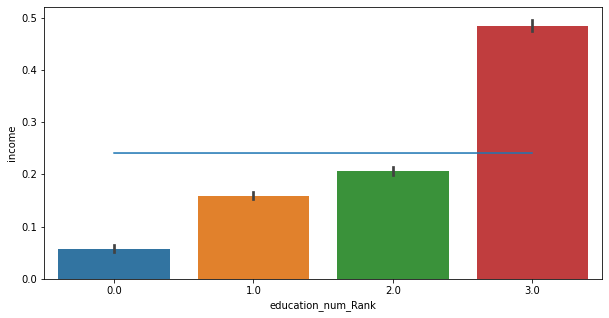

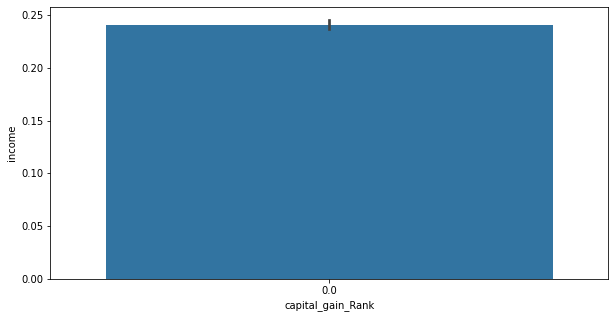

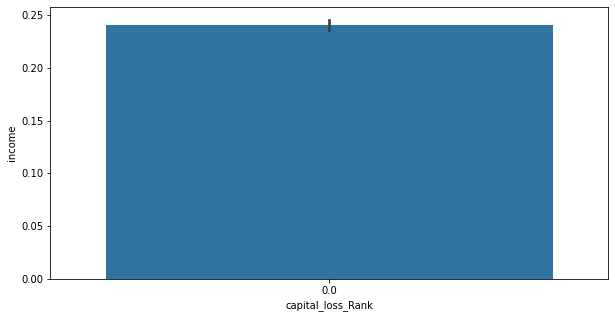

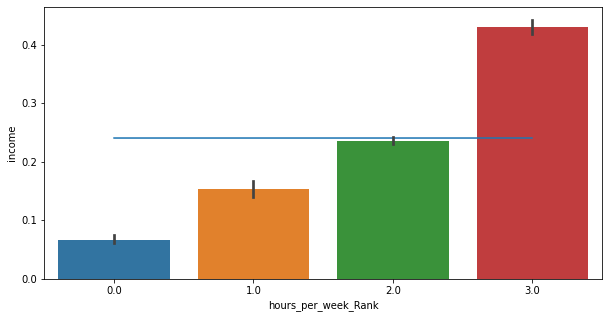

In [131]:
check_slope()

**Droping all features that don't have a stronger slope**

In [133]:
num_feat_done = num_feat_none_var.drop(["capital_gain", "capital_loss"], axis=1)

In [207]:
select_features_df_num = num_feat_done
select_features_df_num.head()

,age,fnlwgt,education_num,hours_per_week
0,39.0,77516.0,13.0,40.0
1,50.0,83311.0,13.0,13.0
2,38.0,215646.0,9.0,40.0
3,53.0,234721.0,7.0,40.0
4,28.0,338409.0,13.0,40.0


## Feature Selection/Discretization - Categorical Features

In [138]:
def check_categorical_slope():
    X_categorical_merged = pd.concat([y, categorical_features], axis=1, join="inner")

    for col in categorical_features.columns:
        plt.figure()
        sns.lineplot(x=col, y=X_categorical_merged["income"].mean(), data=X_categorical_merged)
        sns.barplot(x=col, y="income", data=X_categorical_merged, estimator=np.mean)

    plt.show()

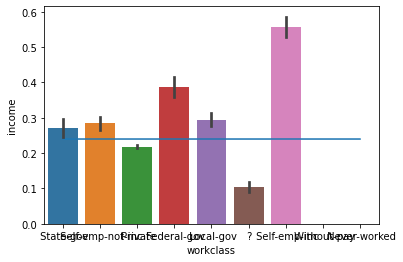

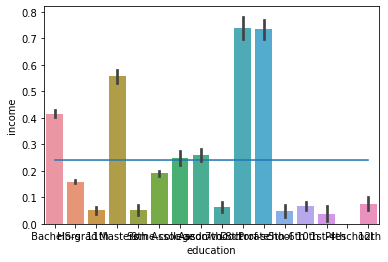

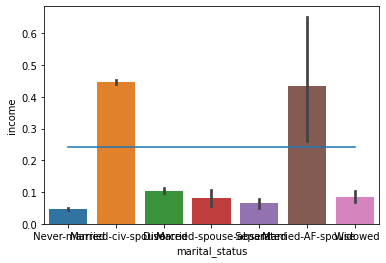

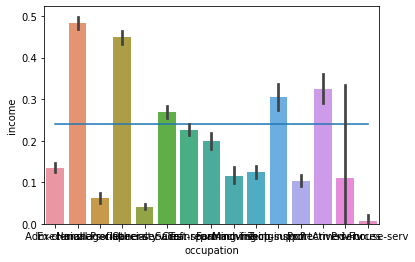

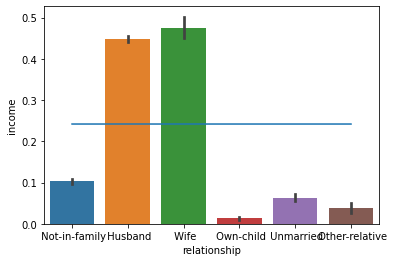

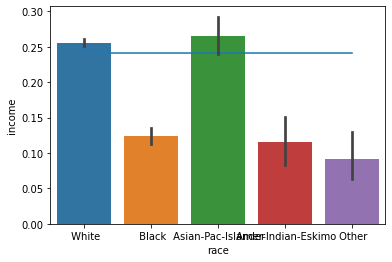

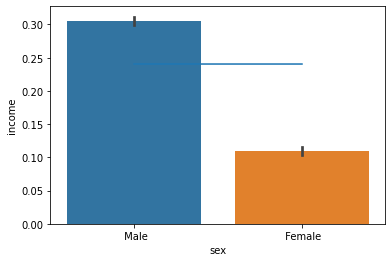

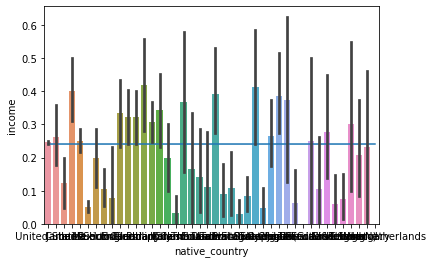

In [139]:
check_categorical_slope()

Basically I don't have any categorical features that have a weaky slope. But i have ambiguous feature of education, because i already have education in numerical features.

In [458]:
categorical_features_temp = categorical_features

categorical_features_done = categorical_features_temp.drop(["education"], axis=1)
categorical_features_done.head()

,workclass,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [142]:
categorical_features_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   marital_status  32561 non-null  object
 2   occupation      32561 non-null  object
 3   relationship    32561 non-null  object
 4   race            32561 non-null  object
 5   sex             32561 non-null  object
 6   native_country  32561 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


**Dummies the categorical variables**

In [459]:
X_categorical_dum = pd.get_dummies(categorical_features_done, drop_first=True)
X_categorical_dum.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Select K Best**

In [460]:
skb = SelectKBest(score_func=chi2, k="all")
skb.fit_transform(X_categorical_dum, y)
columns = skb.get_support(indices=True)
select_features_df_categorical = X_categorical_dum.iloc[:, columns]

In [461]:
columns

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78])

## Put all together

In [211]:
X_all = pd.concat([select_features_df_categorical, select_features_df_num], axis=1, join="inner")

print(f"Number of obsevations: {X_all.shape[0]}, Number of featues: {X_all.shape[1]}")

Number of obsevations: 32561, Number of featues: 83


# Train/Test Split

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.25, random_state=42)

print(f"Amount of Train Samples: {len(X_train)} - Amount of Test Sample: {len(X_test)}")

Amount of Train Samples: 24420 - Amount of Test Sample: 8141


In [228]:
select_features_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   fnlwgt          32561 non-null  float64
 2   education_num   32561 non-null  float64
 3   hours_per_week  32561 non-null  float64
dtypes: float64(4)
memory usage: 1017.7 KB


In [376]:
numerical = ['age', 'fnlwgt', 'education_num', 'hours_per_week']

scaler = MinMaxScaler()
scaler.fit(X_train[numerical])

MinMaxScaler()

In [377]:
X_train[numerical] = scaler.transform(X_train[numerical])

In [378]:
X_test[numerical] = scaler.transform(X_test[numerical])

# Apply Logistic Regression

In [ ]:
lgr_model = LogisticRegression(C=1.0, random_state=42)
lgr_model.fit(X_train, y_train)

In [233]:
pred = lgr_model.predict(X_test)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.8374, F1-score: 0.6167


In [ ]:
results = cross_validate(lgr_model, X_train, y_train, cv=10, scoring=['accuracy', 'f1'], return_train_score=True)

In [222]:
print(f'Accuracy - train: {results["train_accuracy"].mean()}, | Validation: {results["test_accuracy"].mean()}')
print(f'F1-score - train: {results["train_f1"].mean()}, | Validation: {results["test_f1"].mean()}')

Accuracy - train: 0.8367139867139866, | Validation: 0.8350941850941851
F1-score - train: 0.6282087677775628, | Validation: 0.6244755383321183


**Look importance of each feature**

In [234]:
coeff_df = pd.DataFrame(X_all.columns)
coeff_df.columns=["features"]
coeff_df["Coefficient Estimate"] = pd.Series(lgr_model.coef_[0])
coeff_df

,features,Coefficient Estimate
0,workclass_ Federal-gov,0.961232
1,workclass_ Local-gov,0.265568
2,workclass_ Never-worked,-0.150104
3,workclass_ Private,0.462416
4,workclass_ Self-emp-inc,0.699179
...,...,...
78,native_country_ Yugoslavia,0.212724
79,age,1.751197
80,fnlwgt,0.378459
81,education_num,3.760947


# Apply Decision Tree

In [235]:
dtc = DecisionTreeClassifier(criterion="entropy", random_state=42)

param_dist = {"max_depth": [3, 5, 6, 7, 10, 15], "min_samples_split": [50, 100, 150, 200, 250, 500]}
dtc_grid = GridSearchCV(estimator=dtc, param_grid=param_dist, cv=10, n_jobs=3)
dtc_grid.fit(X_train, y_train)

print("Best Parameters using grid search")
print(dtc_grid.best_params_)

Best Parameters using grid search
{'max_depth': 10, 'min_samples_split': 200}


In [236]:
dtc_model = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=200, random_state=42)
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=200, random_state=42)

In [237]:
pred = dtc_model.predict(X_test)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.8376, F1-score: 0.6231


In [238]:
dtc = DecisionTreeClassifier(criterion="gini", random_state=42)

param_dist = {"max_depth": [3, 5, 6, 7, 10, 15], "min_samples_split": [50, 100, 150, 200, 250, 500]}
dtc_grid = GridSearchCV(estimator=dtc, param_grid=param_dist, cv=10, n_jobs=3)

In [239]:
results = cross_validate(dtc_grid, X_train, y_train, cv=10, scoring=['accuracy', 'f1'], return_train_score=True)
print(f'Accuracy - train: {results["train_accuracy"].mean()}, | Validation: {results["test_accuracy"].mean()}')
print(f'F1-score - train: {results["train_f1"].mean()}, | Validation: {results["test_f1"].mean()}')

Accuracy - train: 0.8385294385294385, | Validation: 0.8294840294840296
F1-score - train: 0.6434216339514494, | Validation: 0.6222550884897824


**Visualize rules created by Decision Tree algorithm**

In [192]:
def plot_decision_tree():
    plt.figure(figsize=[50, 10])
    plot_tree(decision_tree=dtc_model, filled=True, fontsize=10, rounded=True, feature_names=X_all.columns)
    plt.show()

In [ ]:
# plot_decision_tree() # This approach doens't make sense because we have many features to look

# Apply Random Forest

In [246]:
rfc_model = RandomForestClassifier(criterion="gini", random_state=42, max_depth=200,
                             min_samples_split=10)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=200, min_samples_split=10, random_state=42)

In [247]:
pred = rfc_model.predict(X_test)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.8426, F1-score: 0.6333


In [249]:
rfc_model = RandomForestClassifier(criterion="entropy", random_state=42)
param_dist = {"max_depth": [3, 5, 6, 7, 10, 15, 100, 500], "min_samples_split": [50, 100, 150, 200, 250, 500]}
rfc_grid = GridSearchCV(estimator=rfc_model, param_grid=param_dist, cv=10, n_jobs=3)
rfc_grid.fit(X_train, y_train)

print("Best Parameters using grid search")
print(rfc_grid.best_params_)

Best Parameters using grid search
{'max_depth': 100, 'min_samples_split': 50}


In [251]:
rfc_model = RandomForestClassifier(criterion="entropy", max_depth=100, min_samples_split=50, random_state=42)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_split=50,
                       random_state=42)

In [252]:
pred = rfc_model.predict(X_test)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.8466, F1-score: 0.6364


**Feature Importance**

In [254]:
features_importances = pd.DataFrame(rfc_model.feature_importances_,
                                    index=X_all.columns,
                                    columns=["importance"]).sort_values("importance", ascending=False)

features_importances

,importance
marital_status_ Married-civ-spouse,1.738424e-01
education_num,1.475251e-01
age,1.304883e-01
hours_per_week,7.623114e-02
marital_status_ Never-married,7.412706e-02
...,...
native_country_ Outlying-US(Guam-USVI-etc),4.417167e-05
workclass_ Never-worked,7.202884e-06
occupation_ Armed-Forces,5.180888e-06
native_country_ Honduras,3.174286e-06


# Apply Gradient Boosting

In [ ]:
gbc_model = GradientBoostingClassifier(criterion="squared_error", random_state=42)
param_dist = {"max_depth": [150], "min_samples_split": [50], "n_estimators": [50, 100]}
gbc_grid = GridSearchCV(estimator=gbc_model, param_grid=param_dist, cv=10, n_jobs=3)
gbc_grid.fit(X_train, y_train)

print("Best Parameters using grid search")
print(gbc_grid.best_params_)

In [264]:
gbc_model = GradientBoostingClassifier(criterion="squared_error", random_state=42,
                                       max_depth=150, min_samples_split=50, n_estimators=50)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=150,
                           min_samples_split=50, n_estimators=50,
                           random_state=42)

In [266]:
pred = gbc_model.predict(X_test)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.8253, F1-score: 0.6136


# Handle with umbalanced classes

Exist many ways to handle with umbalanced dataset, in this experiment I'll use two approachs:

*   Over-sampling;
    * Naive Random approach;
    * Random SMOTE and ADASYN approach.
*   Emsamble of samplers;
    * Balanced Random Forest.



## Oversampling

**Naive Random Approach**

In [268]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train) # get only train to unbias the model

In [269]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, random_state=42, test_size=0.2
)

**Using RandomForest for evaluate the approach**

In [270]:
rfc_model = RandomForestClassifier(criterion="entropy", max_depth=100, min_samples_split=50, random_state=42)
rfc_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_split=50,
                       random_state=42)

In [271]:
pred = rfc_model.predict(X_test_resampled)
acc = accuracy_score(y_test_resampled, pred)
f1 = f1_score(y_test_resampled, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.8482, F1-score: 0.8528


**Check if the model is umbiased**

In [272]:
pred = rfc_model.predict(X_test)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.8086, F1-score: 0.6638


The approach imporve 6% of f1_score (harmonic mean)

**Random SMOTE and ADASYN Approach**

In [279]:
smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train) # get only train to unbias the model
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [280]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, random_state=42, test_size=0.2
)

**Using RandomForest for evaluate the approach**

In [281]:
rfc_model = RandomForestClassifier(criterion="entropy", max_depth=100, min_samples_split=50, random_state=42)
rfc_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_split=50,
                       random_state=42)

**smote approach**

In [277]:
pred = rfc_model.predict(X_test_resampled)
acc = accuracy_score(y_test_resampled, pred)
f1 = f1_score(y_test_resampled, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.8586, F1-score: 0.8622


**Check if the model is umbiased**

In [278]:
pred = rfc_model.predict(X_test)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.8129, F1-score: 0.6624


The approach improve 6% of f1_score (harmonic mean)

**adasyn approach**

In [282]:
pred = rfc_model.predict(X_test_resampled)
acc = accuracy_score(y_test_resampled, pred)
f1 = f1_score(y_test_resampled, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.8429, F1-score: 0.8546


**Check if the model is umbiased**

In [283]:
pred = rfc_model.predict(X_test)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.797, F1-score: 0.6566


The approach improve 5% of f1_score (harmonic mean)

## Emsamble of samplers

**Balanced Random Forest**

In [288]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train) 

In [289]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, random_state=42, test_size=0.2
)

**Using BalancedRandomForest for evaluate the approach**

In [292]:
brf_model = BalancedRandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=50,
                                           random_state=42)
brf_model.fit(X_train_resampled, y_train_resampled)

BalancedRandomForestClassifier(max_depth=100, min_samples_split=50,
                               random_state=42)

In [293]:
pred = brf_model.predict(X_test_resampled)
acc = accuracy_score(y_test_resampled, pred)
f1 = f1_score(y_test_resampled, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.8467, F1-score: 0.8508


**Check if the model is umbiased**

In [296]:
pred = brf_model.predict(X_test)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.8111, F1-score: 0.6668


The approach imporve 6% of f1_score (harmonic mean)

In [299]:
df["income"].value_counts()

 <=50K.    12435
 >50K.      3846
Name: income, dtype: int64

In [301]:
target_names = ["<=50K", ">50K"]
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.87      6214
        >50K       0.57      0.80      0.67      1927

    accuracy                           0.81      8141
   macro avg       0.75      0.81      0.77      8141
weighted avg       0.84      0.81      0.82      8141



**Show feature Importance**

In [303]:
features_importances = pd.DataFrame(brf_model.feature_importances_,
                                    index=X_all.columns,
                                    columns=["importance"]).sort_values("importance", ascending=False)

features_importances

,importance
marital_status_ Married-civ-spouse,1.819475e-01
education_num,1.317156e-01
age,1.269974e-01
marital_status_ Never-married,8.701429e-02
hours_per_week,7.358510e-02
...,...
native_country_ Thailand,1.935488e-05
occupation_ Armed-Forces,1.674886e-05
workclass_ Never-worked,1.042862e-05
native_country_ Honduras,6.972404e-06


In [310]:
def get_encoded_feature():
    X_encoded_feature = X.copy()

    for col in X_encoded_feature.columns:
        if (X_encoded_feature[col].dtypes == "object"):
            encoder = LabelEncoder()
            X_encoded_feature[col] = encoder.fit_transform(X_encoded_feature[col])
    
    return X

In [311]:
feature_importance = pd.DataFrame(zip(get_encoded_feature(), brf_model.feature_importances_ * 100), columns=["feature", "importance"])
feature_importance.head()

,feature,importance
0,age,0.451062
1,workclass,0.381526
2,fnlwgt,0.001043
3,education,0.534848
4,education_num,0.621051


In [312]:
len(feature_importance)

14

In [319]:
def plot_feature_importance(feature_importance):
    plt.figure(figsize=(18,5))
    sns.barplot(data=feature_importance, x="feature", y="importance")


    # add annotations
    impo = feature_importance["importance"]
    locs, labels = plt.xticks()

    for loc, label in zip(locs, labels):
        count = impo[loc]
        pct_string = f"{round(count, 2)}%"
        plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')

    
    plt.title('Features Importance')
    plt.xlabel("Features")
    plt.ylabel("Importance (%)");

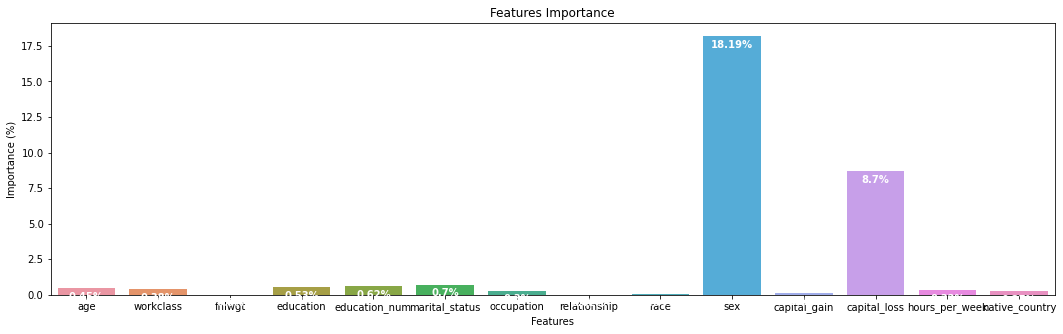

In [320]:
plot_feature_importance(feature_importance)

# Results

## Load test dataset

In [387]:
names_col = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
             'hours_per_week', 'native_country', 'income']
df = pd.read_csv("adult.test", names=names_col)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [388]:
df.drop(labels=0, axis=0, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


## Prepare dataset

In [450]:
df["age"] = [int(age) for age in df['age'].to_list()]

In [486]:
test_target = df.income.replace({" <=50K.": 0, " >50K.": 1}) # target
test_data = df.drop(["income"], axis= 1)

In [464]:
test_target.value_counts()

0    12435
1     3846
Name: income, dtype: int64

In [487]:
def unique_levels(x):
    x = x.value_counts().count()
    return x


def outlier_cap(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    return x


def data_pipeline(data, target):
    global cols, columns
    # Split up into numerical and categoical featue
    numerical_features = data.select_dtypes(include="number")
    categorical_features = data.select_dtypes(include="object")
    df_value_counts = pd.DataFrame(numerical_features.apply(lambda x: unique_levels(x)))
    df_value_counts.columns = ["feature_levels"]

    numerical_features = numerical_features.apply(lambda x: outlier_cap(x))
    num_feat_none_var = numerical_features.iloc[:,cols]


    num_binned = pd.DataFrame(discrete.transform(num_feat_none_var), index=num_feat_none_var.index,
                            columns=num_feat_none_var.columns).add_suffix('_Rank')

    num_feat_done = num_feat_none_var.drop(["capital_gain", "capital_loss"], axis=1)
    select_features_df_num = num_feat_done

    categorical_features_temp = categorical_features
    categorical_features_done = categorical_features_temp.drop(["education"], axis=1)
    
    X_categorical_dum = pd.get_dummies(categorical_features_done, drop_first=True)
    X_categorical_dum["native_country_ Holand-Netherlands"] = [0 for i in range(len(X_categorical_dum))]
    select_features_df_categorical = X_categorical_dum.iloc[:, columns]
    
    X = pd.concat([select_features_df_categorical, select_features_df_num], axis=1, join="inner")
    return X

In [469]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   fnlwgt          32561 non-null  float64
 2   education_num   32561 non-null  float64
 3   capital_gain    32561 non-null  float64
 4   capital_loss    32561 non-null  float64
 5   hours_per_week  32561 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


In [481]:
X_categorical_dum["native_country_ Holand-Netherlands"]

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: native_country_ Holand-Netherlands, Length: 32561, dtype: uint8

In [488]:
test_data = data_pipeline(test_data, test_target)

In [489]:
test_data.shape

(16281, 83)

In [495]:
test_data[numerical] = scaler.transform(test_data[numerical])

## Evaluate Test Set

In [496]:
pred = brf_model.predict(test_data)
acc = accuracy_score(test_target, pred)
f1 = f1_score(test_target, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Accuracy: 0.817, F1-score: 0.6671


In [497]:
target_names = ["<=50K", ">50K"]
print(classification_report(test_target, pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.92      0.83      0.87     12435
        >50K       0.58      0.78      0.67      3846

    accuracy                           0.82     16281
   macro avg       0.75      0.80      0.77     16281
weighted avg       0.84      0.82      0.83     16281

